In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [62]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/MLOPS-Used-Cars Project/scraped_used_cars_data.csv")

df.head()

,title,year_brand_model,mileage,buyer_rating,num_reviews,percent_recommend,review_breakdown,basic_description_keys,basic_description_values,history_description_keys,history_description_values,price
0,1997 Chevrolet S-10 LS Extended Cab,1997 Chevrolet S-10.,"195,000 mi.",4.9,(8 reviews),100% of drivers recommend this car,Comfort 4.4 Interior 3.8 Performance 4.7 ...,"['Exterior color', 'Interior color', 'Drivetra...","['Red', 'Gray', 'Rear-wheel Drive', 'Gasol', '...",NaN,NaN,"$3,999"
1,2021 Ford Expedition Max Limited,NaN,"61,277 mi.",NaN,NaN,NaN,NaN,"['Exterior color', 'Interior color', 'Drivetra...","['Gray', 'Ebony', 'Four-wheel Drive', '16–21',...","['Accidents or damage', '1-owner vehicle', 'Pe...","['At least 1 accident or damage reported', 'Ye...","$37,450"
2,2021 Lamborghini Huracan EVO Base,2021 Lamborghini Huracan EVO.,"8,970 mi.",5.0,(1 review),100% of drivers recommend this car,Comfort 4.0 Interior 5.0 Performance 5.0 ...,"['Exterior color', 'Interior color', 'Drivetra...","['Arancio Borealis Pearl', 'Nero Ade', 'Rear-w...","['Accidents or damage', 'Clean title', '1-owne...","['None reported', 'Yes', 'Yes', 'Yes']","$275,995"
3,2014 Subaru XV Crosstrek Hybrid 2.0i Hybrid,2014 Subaru XV Crosstrek Hybrid.,"117,260 mi.",4.4,(11 reviews),81% of drivers recommend this car,Comfort 4.3 Interior 4.3 Performance 4.1 ...,"['Exterior color', 'Interior color', 'Drivetra...","['Plasma Green Pearl', 'Black', 'All-wheel Dri...","['Accidents or damage', 'Clean title', '1-owne...","['At least 1 accident or damage reported', 'Ye...","$9,499"
4,2015 Scion tC Release Series 9.0,2015 Scion tC.,"135,098 mi.",4.5,(23 reviews),91% of drivers recommend this car,Comfort 4.3 Interior 4.3 Performance 4.4 ...,"['Exterior color', 'Interior color', 'Drivetra...","['Magma', 'Dark Charcoal', 'Front-wheel Drive'...","['Accidents or damage', 'Clean title', '1-owne...","['At least 1 accident or damage reported', 'Ye...","$8,995"


In [63]:
df.info()
print("shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14972 entries, 0 to 14971
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       14972 non-null  object 
 1   year_brand_model            13822 non-null  object 
 2   mileage                     14971 non-null  object 
 3   buyer_rating                13820 non-null  float64
 4   num_reviews                 13820 non-null  object 
 5   percent_recommend           13784 non-null  object 
 6   review_breakdown            13820 non-null  object 
 7   basic_description_keys      14970 non-null  object 
 8   basic_description_values    14970 non-null  object 
 9   history_description_keys    14272 non-null  object 
 10  history_description_values  14272 non-null  object 
 11  price                       14970 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.4+ MB
shape: (14972, 12)


## Check for missing data

In [64]:
df.isnull().sum(axis=0)

title                            0
year_brand_model              1150
mileage                          1
buyer_rating                  1152
num_reviews                   1152
percent_recommend             1188
review_breakdown              1152
basic_description_keys           2
basic_description_values         2
history_description_keys       700
history_description_values     700
price                            2
dtype: int64

In [65]:
df['null_count'] = df.isnull().sum(axis=1)
print("Rows with how many missing values:")
print(df.groupby('null_count').count().max(axis=1))
print('-' * 100)
df_grouped_by_nullCount_dict = df.groupby('null_count').count().max(axis=1).to_dict()
print("Convert to dict:")
print(df_grouped_by_nullCount_dict)
print('-' * 100)
df_grouped_by_nullCount_dict_renamedKeys = { "{} Null Value(s)".format(key): value for key, value in df_grouped_by_nullCount_dict.items() }
print("Number of missing renamed")
print(df_grouped_by_nullCount_dict_renamedKeys)

Rows with how many missing values:
null_count
0     13188
1        35
2       596
3         1
5      1049
7       101
9         1
10        1
dtype: int64
----------------------------------------------------------------------------------------------------
Convert to dict:
{0: 13188, 1: 35, 2: 596, 3: 1, 5: 1049, 7: 101, 9: 1, 10: 1}
----------------------------------------------------------------------------------------------------
Number of missing renamed
{'0 Null Value(s)': 13188, '1 Null Value(s)': 35, '2 Null Value(s)': 596, '3 Null Value(s)': 1, '5 Null Value(s)': 1049, '7 Null Value(s)': 101, '9 Null Value(s)': 1, '10 Null Value(s)': 1}


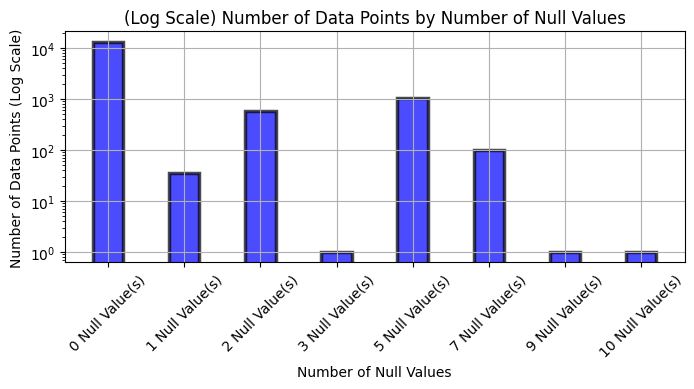

In [66]:
plt.figure(figsize=(8, 3))
plt.bar(x=df_grouped_by_nullCount_dict_renamedKeys.keys(),
        height=df_grouped_by_nullCount_dict_renamedKeys.values(),
        width=0.4, color="blue", alpha=0.7, edgecolor="black", linewidth=2.5)
plt.title("(Log Scale) Number of Data Points by Number of Null Values")
plt.yscale("log")
plt.xlabel("Number of Null Values")
plt.ylabel("Number of Data Points (Log Scale)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [67]:
df.dropna(subset=["basic_description_keys", "history_description_keys"], inplace=True)
df.shape

(14272, 13)

## Create year, brand, and model columns

In [68]:
df["year"] = df["title"].apply(lambda x: x[:4]).astype(np.float32)

In [69]:
df["year_brand_model"].fillna(df["title"], inplace=True)

In [70]:
df["brand"] = df["title"].apply(lambda x: x.split()[1])

In [71]:
df["model"] = df["title"].apply(lambda x: " ".join(x.split()[2:]))

In [72]:
df["model"]

1                 Expedition Max Limited
2                       Huracan EVO Base
3        XV Crosstrek Hybrid 2.0i Hybrid
4                  tC Release Series 9.0
5               xD Base 4dr Hatchback 4A
                      ...               
14967                    Prius Prime XLE
14968                  Pathfinder SV 4WD
14969                      Venza Limited
14970                 Pacifica Touring L
14971                   Palisade Limited
Name: model, Length: 14272, dtype: object

## Clean up mileage, num_reviews, percent_recommend columns and convert them to np.float32

In [73]:
df.drop(columns=["title", "year_brand_model", "null_count"], inplace=True)

In [74]:
df["mileage"] = df["mileage"].replace(to_replace='[\,mi\.]', value='', regex=True).astype(np.float32)

In [75]:
# regex: \, removes comma, \( and \) removes (), \s removes space
df["num_reviews"] = df["num_reviews"].replace(to_replace='[\(\,\sreviews\)]', value='', regex=True).astype(np.float32)

In [76]:
df["percent_recommend"].fillna("-100% of drivers recommend this car", inplace=True)

In [77]:
df["percent_recommend"] = df["percent_recommend"].apply(lambda x: x.split()[0][:-1]).astype(np.float32)

### review_breakdown is an array stored as a string (the array brackets [] are also strings), break up the string/array into multiple columns and join them to original dataframe

In [78]:
def extract_detailed_review():
    row = df["review_breakdown"].iloc[1]
    arr = []
    for review in row.split("  "):
        criteria_rating = review.strip().split(" ")
        criteria = criteria_rating[0]
        rating = criteria_rating[1]
        arr.append("'" + criteria.lower() + "_review'")

    return ", ".join(arr)

extract_detailed_review()

"'comfort_review', 'interior_review', 'performance_review', 'value_review', 'exterior_review', 'reliability_review'"

In [79]:
review_df = df["review_breakdown"].str.split("  ", n=5, expand=True)
review_df.columns = ['comfort_review', 'interior_review', 'performance_review', 'value_review', 'exterior_review', 'reliability_review']

In [80]:
review_df["comfort_review"] = review_df["comfort_review"].replace(to_replace='[Comfort\s]', value='', regex=True).astype(np.float32)
review_df["interior_review"] = review_df["interior_review"].replace(to_replace='[Interior\s]', value='', regex=True).astype(np.float32)
review_df["performance_review"] = review_df["performance_review"].replace(to_replace='[Performance\s]', value='', regex=True).astype(np.float32)
review_df["value_review"] = review_df["value_review"].replace(to_replace='[Value\s]', value='', regex=True).astype(np.float32)
review_df["exterior_review"] = review_df["exterior_review"].replace(to_replace='[Exterior\s]', value='', regex=True).astype(np.float32)
review_df["reliability_review"] = review_df["reliability_review"].str.extract('(\d+\.\d+)').astype(np.float32)

In [81]:
review_df.fillna(-5.0, inplace=True)

In [82]:
df = pd.concat([df.reset_index(drop=True), review_df.reset_index(drop=True)], axis=1)

In [83]:
df.drop(columns=["review_breakdown"], inplace=True)

### basic_description_values is also an array stored as a string (the array brackets [] are also strings), break up the string/array into multiple columns and join them to original dataframe

In [84]:
df["basic_description_values"] = df["basic_description_values"].replace(to_replace="[\[\]]", value="", regex=True)

In [85]:
description_df = df["basic_description_values"].str.split(",", n=9, expand=True)
description_df.columns = ['exterior_color', 'interior_color', 'drivetrain', 'MPG', 'fuel_type', 'transmission', 'engine', 'VIN', 'stock_number', 'mileage']

In [86]:
description_df.drop(columns=["engine", "VIN",	"stock_number",	"mileage"], inplace=True)

In [87]:
df = pd.concat([df.reset_index(drop=True), description_df.reset_index(drop=True)], axis=1)

In [88]:
df.drop(columns=["basic_description_keys", "basic_description_values"], inplace=True)

### history_description_values is also an array stored as a string (the array brackets [] are also strings) but its more complicated as some arrays are bigger than others, so we find out how many elements each array has, extract each separately, but if array is smaller, we add extra columns with "unknowns" and finally join all the dataframes

In [89]:
df["history_description_values"] = df["history_description_values"].replace(to_replace="[\[\]]", value="", regex=True)

In [90]:
history_keys_map = {}
for i in range(df.shape[0]):
    if len(df["history_description_keys"].iloc[i]) in history_keys_map:
        history_keys_map[len(df["history_description_keys"].iloc[i])] += 1
    else:
        history_keys_map[len(df["history_description_keys"].iloc[i])] = 1

history_keys_map

{63: 9430, 78: 4093, 93: 567, 59: 75, 117: 103, 2: 1, 74: 3}

In [91]:
# drop rows with little or faulty history
no_history_index = df[df["history_description_keys"].str.len() == 2].index
df.drop(labels=no_history_index, inplace=True)

commercial_index = df[df["history_description_keys"].str.len() == 117].index
df.drop(labels=commercial_index, inplace=True)

too_few_records_index = df[df["history_description_keys"].str.len() == 74].index
df.drop(labels=too_few_records_index, inplace=True)

df.reset_index(inplace=True)

In [92]:
print(df[df["history_description_keys"].str.len() == 63]["history_description_keys"].iloc[0])
print(df[df["history_description_keys"].str.len() == 78]["history_description_keys"].iloc[0])
print(df[df["history_description_keys"].str.len() == 93]["history_description_keys"].iloc[0])
print(df[df["history_description_keys"].str.len() == 59]["history_description_keys"].iloc[0])

['Accidents or damage', '1-owner vehicle', 'Personal use only']
['Accidents or damage', 'Clean title', '1-owner vehicle', 'Personal use only']
['Accidents or damage', 'Clean title', '1-owner vehicle', 'Personal use only', 'Open recall']
['Accidents or damage', 'Clean title', 'Personal use only']


## Extract history_description_values arrays of different lengths into separate dataframes

In [93]:
partial_history_data1 = df[df["history_description_keys"].str.len() == 63][["history_description_keys", "history_description_values"]]

# create new dataframe
partial_history_data1 = partial_history_data1["history_description_values"].str.split(",", n=2, expand=True)
partial_history_data1.columns = ['accidents_or_damage', 'one_owner_vehicle', 'personal_use_only']

# create new columns
partial_history_data1["clean_title"] = "Unknown"
partial_history_data1["open_recall"] = "Unknown"

# rearrange columns
columns_data1 = list(partial_history_data1)

columns_data1 = [columns_data1[0]] + [columns_data1[-2]] + columns_data1[1:3] + [columns_data1[-1]]
partial_history_data1 = partial_history_data1[columns_data1]

In [94]:
partial_history_data2 = df[df["history_description_keys"].str.len() == 78][["history_description_keys", "history_description_values"]]

# create new dataframe
partial_history_data2 = partial_history_data2["history_description_values"].str.split(",", n=3, expand=True)
partial_history_data2.columns = ['accidents_or_damage', 'clean_title', 'one_owner_vehicle', 'personal_use_only']

# create new column
partial_history_data2["open_recall"] = "Unknown"

In [95]:
partial_history_data3 = df[df["history_description_keys"].str.len() == 93][["history_description_keys", "history_description_values"]]

partial_history_data3 = partial_history_data3["history_description_values"].str.split(",", n=4, expand=True)
partial_history_data3.columns = ['accidents_or_damage', 'clean_title', 'one_owner_vehicle', 'personal_use_only', 'open_recall']

In [96]:
partial_history_data4 = df[df["history_description_keys"].str.len() == 59][["history_description_keys", "history_description_values"]]

# create new dataframe
partial_history_data4 = partial_history_data4["history_description_values"].str.split(",", n=2, expand=True)
partial_history_data4.columns = ['accidents_or_damage', 'clean_title', 'personal_use_only']

# create new columns
partial_history_data4["one_owner_vehicle"] = "Unknown"
partial_history_data4["open_recall"] = "Unknown"

# rearrange columns
columns_data4 = list(partial_history_data4)

columns_data4 = columns_data4[0:2] + [columns_data4[-2]] + [columns_data4[2]] + [columns_data4[-1]]
partial_history_data4 = partial_history_data4[columns_data4]

In [97]:
partial_history_data1.shape[0] + partial_history_data2.shape[0] + partial_history_data3.shape[0] + partial_history_data4.shape[0]

14165

## Push those partial dataframes into a single array and in the right order where order is by index

In [98]:
num_rows = partial_history_data1.shape[0] + partial_history_data2.shape[0] + partial_history_data3.shape[0] + partial_history_data4.shape[0]
num_cols = len(partial_history_data1.columns)

empty_array = np.empty((num_rows, num_cols), dtype=object)

history_df = pd.DataFrame(empty_array, columns=partial_history_data1.columns)

In [99]:
partial_history_index1 = list(partial_history_data1.index)
partial_history_index1.reverse()

partial_history_index2 = list(partial_history_data2.index)
partial_history_index2.reverse()

partial_history_index3 = list(partial_history_data3.index)
partial_history_index3.reverse()

partial_history_index4 = list(partial_history_data4.index)
partial_history_index4.reverse()

while len(partial_history_index1) > 0:
    index1 = partial_history_index1.pop()
    history_df.loc[index1] = partial_history_data1.loc[index1]

while len(partial_history_index2) > 0:
    index2 = partial_history_index2.pop()
    history_df.loc[index2] = partial_history_data2.loc[index2]

while len(partial_history_index3) > 0:
    index3 = partial_history_index3.pop()
    history_df.loc[index3] = partial_history_data3.loc[index3]

while len(partial_history_index4) > 0:
    index4 = partial_history_index4.pop()
    history_df.loc[index4] = partial_history_data4.loc[index4]

In [100]:
history_df.isnull().sum(axis=0)

accidents_or_damage    0
clean_title            0
one_owner_vehicle      0
personal_use_only      0
open_recall            0
dtype: int64

## Join original dataframe with the history dataframe

In [101]:
df = pd.concat([df.reset_index(drop=True), history_df.reset_index(drop=True)], axis=1)

In [102]:
df.drop(columns=["history_description_keys",	"history_description_values"], inplace=True)

### Clean up the price column and replace missing values in buyer_rating and num_reviews with the negative of largest number so dividing by max value returns -1 for missing

In [103]:
no_price_index = df[df["price"] == "Not Priced"].index
df.drop(labels=no_price_index, inplace=True)

In [104]:
df["price"] = df["price"].replace(to_replace='[\,\$]', value='', regex=True).astype(np.float32)

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df["buyer_rating"].fillna(-5.0, inplace=True)

In [107]:
df["num_reviews"].fillna(-1 * df["num_reviews"].max(), inplace=True)

In [108]:
df.isnull().sum(axis=0)

index                  0
mileage                0
buyer_rating           0
num_reviews            0
percent_recommend      0
price                  0
year                   0
brand                  0
model                  0
comfort_review         0
interior_review        0
performance_review     0
value_review           0
exterior_review        0
reliability_review     0
exterior_color         0
interior_color         0
drivetrain             0
MPG                    0
fuel_type              0
transmission           0
accidents_or_damage    0
clean_title            0
one_owner_vehicle      0
personal_use_only      0
open_recall            0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14164 entries, 0 to 14164
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                14164 non-null  int64  
 1   mileage              14164 non-null  float32
 2   buyer_rating         14164 non-null  float64
 3   num_reviews          14164 non-null  float32
 4   percent_recommend    14164 non-null  float32
 5   price                14164 non-null  float32
 6   year                 14164 non-null  float32
 7   brand                14164 non-null  object 
 8   model                14164 non-null  object 
 9   comfort_review       14164 non-null  float32
 10  interior_review      14164 non-null  float32
 11  performance_review   14164 non-null  float32
 12  value_review         14164 non-null  float32
 13  exterior_review      14164 non-null  float32
 14  reliability_review   14164 non-null  float32
 15  exterior_color       14164 non-null  obje

In [110]:
df.drop(columns=["index"], inplace=True)

In [111]:
df["brand"] = df["brand"].replace(to_replace=r"\bAston\b", value="Aston Martin", regex=True)

### Clean miles per gallon column (MPG)

In [112]:
df["MPG"] = df["MPG"].replace(to_replace="[\'\'\s]", value="", regex=True)

In [113]:
def clean_mpg(mpg):
    if len(mpg) == 5:
        _mpg = mpg.split("–")
        if len(_mpg) == 2:
            low, high = _mpg
            low = float(low)
            high = float(high)
            return (low + high) / 2
        else:
           return None
    elif len(mpg) == 2:
        return float(mpg)
    elif len(mpg) == 1 or len(mpg) == 3:
        return None
    elif len(mpg) == 4:
        _mpg = mpg.split("–0")[0]
        if len(_mpg) == 2:
            _mpg = float(_mpg)
        else:
            _mpg = None
        return _mpg

In [114]:
df["MPG"] = df["MPG"].apply(clean_mpg)
df.rename(columns={ "MPG": "average_mpg" }, inplace=True)

### Remove quotation marks around several columns

In [115]:
df["exterior_color"] = df["exterior_color"].replace(to_replace="[\'\']", value="", regex=True)
df["interior_color"] = df["interior_color"].replace(to_replace="[\'\']", value="", regex=True)
df["drivetrain"] = df["drivetrain"].replace(to_replace="[\'\']", value="", regex=True)
df["fuel_type"] = df["fuel_type"].replace(to_replace="[\'\']", value="", regex=True)
df["transmission"] = df["transmission"].replace(to_replace="[\'\']", value="", regex=True)
df["accidents_or_damage"] = df["accidents_or_damage"].replace(to_replace="[\'\']", value="", regex=True)
df["clean_title"] = df["clean_title"].replace(to_replace="[\'\']", value="", regex=True)
df["one_owner_vehicle"] = df["one_owner_vehicle"].replace(to_replace="[\'\']", value="", regex=True)
df["personal_use_only"] = df["personal_use_only"].replace(to_replace="[\'\']", value="", regex=True)
df["open_recall"] = df["open_recall"].replace(to_replace="[\'\']", value="", regex=True)

### Clean up personal use, open recall, and drivetrain

In [116]:
df["personal_use_only"] = df["personal_use_only"].replace(to_replace=r"\bAt least 1 open recall reported\b", value="Unknown", regex=True)

In [117]:
df["open_recall"] = df["open_recall"].replace(to_replace=r"\s\bAt least 1 open recall reported\b", value="At least 1 recall", regex=True)

In [118]:
df["drivetrain"] = df["drivetrain"].apply(lambda x: x.strip())

In [119]:
df["drivetrain"] = df["drivetrain"].replace(to_replace=r"–", value="Unknown", regex=True)
df["drivetrain"] = df["drivetrain"].replace(to_replace=r"RWD", value="Rear-wheel Drive", regex=True)
df["drivetrain"] = df["drivetrain"].replace(to_replace=r"AWD", value="All-wheel Drive", regex=True)
df["drivetrain"] = df["drivetrain"].replace(to_replace=r"FWD", value="Front-wheel Drive", regex=True)

In [120]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Projects/MLOPS-Used-Cars Project/cleaned_scraped_used_cars_data.csv", index=False)